# Particle physics data-analysis with CMS open data

Welcome to the RAL Particle Physics masterclass computer exercise, here we will use real data from the CMS experiment at CERN for a simple particle physics data-analysis. 

The goal of the exercise is to understand how particles are discovered, as an example we will look at the <b> discovery of the Z boson </b>.

In the exercise, invariant mass values will be calculated for muon pairs that are detected in the CMS detector. A histogram will be made from the calculated invariant mass value, and the mass of the <b> Z </b> estimated.

Finally, we will also look at 4-lepton events and try to identify the <b> Higgs boson </b>.

The structure of the exercise is:
- Theory background
- Looking at some event displays
- Computer exercise:
    - Introduction to computing and python 
    - Loading the data
    - Making some plots
    - Calculating the invariant mass
    - Looking for Higgs to 4-lepton decays

If you complete the exercise and have time left, there are two possible extension exercises:
 - fitting the <b> Z </b> mass distribution to determine the mass and lifetime of the <b> Z boson </b>
 - the effect of pseudorapidity on the <b> Z </b> mass distribution


<!-- Now take a relaxed position and read the theory background first. Understanding the theory is essential for reaching the goal and learning from the exercise. So take your time and enjoy the fascination of particle physics! -->

## Part1 : Theory background

Particle physics is the field of physics where structures of matter and radiation and the interactions between them are studied. In experimental particle physics,  research is performed by accelerating particles and colliding them either with other partciles or with solid targets. This is done with _particle accelerators_ and  the collisions are examined with _particle detectors_.

The world's largeest particle accelerator, the Large Hadron Collider (LHC), is located at CERN, the European Organization for Nuclear Research. The LHC is a 27 kilometers long circle-shaped synchrotron accelerator. The LHC is located in a tunnel 100 meters underground on the border of France and Switzerland (image 1).

<figure>
    <center> <img src="images/LHC.png" alt="image missing" style="height: 350px" />
   <figcaption>Image 1: The LHC accelerator and the four detectors around it. &copy; <a href="https://cds.cern.ch/record/1708847">CERN</a> [1]</figcaption> </center>
</figure>

In 2012 the ATLAS and CMS experiments at CERN made an announcement that they had observed a new particle with a mass equal to the predicted mass of the Higgs boson. The Higgs boson and the Higgs field related to it explain the origin of the mass of particles. In 2013 Peter Higgs and François Englert, who predicted the Higgs boson theoretically, were awarded the Nobel prize in physics.

### Accelerating particles

The LHC mainly accelerates protons. The proton source of the LHC is a bottle of hydrogen. Protons are produced by stripping the electrons away from the hydrogen atoms with the help of an electric field.

The process of accelerating the protons starts before the LHC. Before the protons arrive in the LHC are accelerated with electric fields and directed with magnetic fields in the Linac 2, Proton Synchrotron Booster, Proton Synchrotron and Super Proton Synchrotron accelerators. After these the protons have an energy of 450 GeV. The protons are injected into the LHC in two different beampipes, each beam contains 2808 proton bunches located about 7.5 meters from each other. Each of these bunches include $1\text{.}2\cdot 10^{11}$ protons.

The two beams circulate in opposite directions in two different vacuum tubes. Image 2 shows a part of the LHC accelerator opened with the two vacuum tubes visible inside. Each of the proton beams will reach the energy of about 7 TeV (7000 GeV) in LHC.

<figure>
   <center> <img src="images/LHC2.jpg" alt="image missing" style="height: 350px" />
     <figcaption>Image 2: Part of the LHC accelerator opened. &copy; <a href="https://cds.cern.ch/record/905940">CERN</a> [2]</figcaption> </center>
</figure>

Particle collisions are created by crossing these two beams that are heading in opposite directions. Because the bunches are travelling so fast, there will be about 40 million bunch crosses per one second in the LHC. When two proton bunches cross not all of the protons collide with each others. Only about 40 protons per bunch will collide and so create about 20 collisions. But that means there will be 800 million proton collisions every second in the LHC. That's a lot of action!

The maximum energy in collisions is 14 TeV. However in most cases the collision energy is smaller than that because when protons collide it is really their constitiuents, the quarks and gluons, which collide with each other. So not all of the energy of the protons is transmitted to the collision.

When the protons collide the energy of the collision can be transformed into mass ($E=mc^2$) and new particles are produced in the collisions. These new particles are ejected from the collision area, a bit like a small explosion. By examining and measuring the particles created in collisions, researchers try to understand better the known particles which make up our universe and search for new particles which could explain puzzles such as dark matter. 



### Video

The acceleration and collision processes are summarised well in the short video below. Watch the video from the start until 1:15 to get a picture about these processes. You can start the video by running the code cell below (click the cell and then press SHIFT + ENTER).

In [1]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/pQhbhpU9Wrg" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/opt/tljh/user/lib/python3.7/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### Examining particle collisions

At the LHC the proton beams are brought together to colide at four different points. In order to study the particles produced by the collisions, <b>particle detectors</b> are built around the collision points. 
The four particle detectors at the LHC are ATLAS, LHCb, ALICE and CMS (check the image 1).

In image 3 there is a visualisation of some particles created in one collision <b>event</b> seen at the CMS (Compact Muon Solenoid) detector.

<figure>
  <center>  <img src="images/eventdisplay.png" alt="image missing" style="height: 450px" />
     <figcaption>Image 3: A visualised collision event.</figcaption> </center>
</figure>

This exercise uses data recorded by the CMS detector so lets look in more detail at CMS....


Simplified, the goal of the CMS detector is to detect particles that are created in collisions and measure different quantities from them. The CMS detector consists of different <b> sub-detectors</b> which form an onion-like structure around the collision point. This structure ensures that as many partciles as possible from the collision are detected and measured. 


<figure>
    <center> <img src="images/CMS.jpg" alt="image missing" style="height: 360px" />
    <figcaption>Image 4: The CMS detector opened. &copy; <a href="https://cds.cern.ch/record/1433717">CERN</a> [3]</figcaption> </center>
</figure>


Different particles act differently in the different sub-detectors of CMS. Image 5 shows a cross-section of the CMS detector. The particle beams would travel in and out from the plane. Image 5 also demonstrates how different particles can be identified in the detector.


<figure>
   <center>  <img src="images/CMS2.gif" alt="image missing" style="height: 350px" />
   <figcaption>Image 5: The cross-section of the CMS and different particle interactions in it. &copy; <a href="https://cms-docdb.cern.ch/cgi-bin/PublicDocDB/ShowDocument?docid=4172">CERN</a> [4]</figcaption> </center>
</figure>

**** Still need to edit this section ***** 
*** ADd table from old masterclass? *** 


Let's look at the different parts of the detector: 
<dl>
    <dt> Tracker </dt>
    <dd> The innermost part is the silicon tracker. The silicon tracker makes it possible to reconstruct trajectories of charged particles. Charged particles interact electromagnetically with the tracker and create an electric pulse. An intense magnetic field bends the trajectories of the charged particles. With the curvature of the trajectories shown by the pulses created in the tracker, it is possible to calculate the momenta of the charged particles. </dd>
    <dt> Calorimeter </dt>
    <dd> Particle energies can be measured with help of the calorimeters. Electrons and photons will stop to the Electromagnetic Calorimeter (ECAL). Hadrons, for example protons or neutrons, will pass through the ECAL but will be stopped in the Hadron Calorimeter (HCAL).
 ECAL is made from lead tungstate crystals that will produce light when electrons and photons pass through them. The amount of light produced is propotional to the energy of the particle. So it is possible to determine the energy of the particle stopped in ECAL with the photodetectors. Also the operation of the HCAL is based on detecting light. </dd>
<dt> Muon detector </dt>
<dd> Only muons and weakly interacting particles like neutrinos will pass both the ECAL and HCAL. Energies and momenta of muons can be determined with the muon chambers. The detection of the momentum is based on electrical pulses that muons create in the different sections of the muon chambers. Energies of muons can't be measured directly, but the energies will be determined by calculating them from the other measured quantities.</dd>
</dl>

Neutrinos can't be detected directly in the detector (they only interact very weakly and pass right through the detector), but the existence of them can be derived with the help of missing energy. It is possible that the total energy of the particles detected in a collision is smaller than the energy before the collision. This makes a conflict with the energy conservation. The situation indicates that something has been left undetected in the collision, so there is a possibility that neutrons are created in the collision.

## Part2 : Looking at some events

We can look at some more event displays by downloading the file <a href="Events/EventDisplays.pdf"> here </a>

### Indirect detection of particles

As we have seen,  not every particle can be detected directly with the particle detectors. Interesting particles are often short-lived and <b> decay </b> essentially at the interaction point so never reach the detectors. These processes can be searched for via their long-lived decay products, this is indirect detection.

For example the Z boson (the particle that mediates weak interaction) can't be detected directly with the CMS since the lifetime of the Z is very short. That means that the Z boson will decay before it even reaches the silicon detector of the CMS.

How it is possible to detect the Z boson then? A solution to this question comes from the decay process of the Z boson. If particles that originate from the decay of the Z are prossible to detect, it is also possible to deduce the existence of the Z. So the detection is indirect.

The Z boson can decay with in many ways (24 in fact) and in this exercise we will look at one of these: the decay of the Z to a muon ($\mu^-$) and an antimuon ($\mu^+$). This decay process is shown as a Feynman diagram in the image 7.

<figure>
   <center>   <img src="images/Zdecay.png" alt="image missing" style="height: 170px" />
   <figcaption>Image 6: Feynmann diagram of the process where the Z boson decays to a muon and an antimuon.</figcaption> </center>
</figure>


The muons that are created from the decay of the Z can be detected. But just the detection of the muon and the antimuon isn't  sufficient evidence for the existence of the Z as they could have originated from another process (there are many different processes which can lead to the same final state). 
Assuming that the muon, antimuon pair came from the decay of a single </b> "mother" </b> particle, we can use their momentum and energy to calculate the <b> invariant mass </b> of that particle.

With the invariant mass it is possible to prove the existence of particles. 

In our example, we can take all the muon-antimuon events recorded by CMS and calculate the invariant mass for each event.
If we get a different answer each time then the muon-antimuon pair were just a random combination.
If the answer is always the same it indicates that the muon-antimuon pair came from a single particle.

In this notebook we will make this calculation for the decay of the Z to two muons shown in the image 7 and then later for the decay of the Higgs to two Z bosons.

This exercise uses data that contains collisions where two muons have been detected (among with many of other particles). It is possible to calculate an invariant mass value for the muon pair in an one collision event with the equation (2). And this can be repeated for a great amount of collision events.

If the invariant mass of the muon pair is equal to the mass of the Z boson it can be verified that the muon pair originates from the deacay of the Z. And if the invariant mass of the muon pair gets some other value the muons will originate from some other processes. __So the invariant mass can be used as an evidence about the existence of a particle__.

Now for some computing and maths......

### Calculating the invariant mass

The mass of the Z boson can be determined with the help of a concept called _invariant mass_. Let's next derive loosely an expression for the invariant mass.

Let's observe a situation where a particle with mass $M$ and energy $E$ decays to two particles with masses $m_1$ and $m_2$, and energies $E_1$ and $E_2$. Energy $E$ and momentum $\vec{p}$ is conserved in the decay process so $E = E_1 +E_2$ and $\vec{p} = \vec{p}_1+ \vec{p}_2$.

Particles will obey the relativistic dispersion relation:

$$
Mc^2 = \sqrt{E^2 - c^2\vec{p}^2}.
$$

And with the conservation of energy and momentum this can be shown as

$$
Mc^2 = \sqrt{(E_1+E_2)^2 - c^2(\vec{p_1} + \vec{p_2})^2}
$$
<!--
$$
=\sqrt{E_1^2+2E_1E_2+E_2^2 -c^2\vec{p_1}^2-2c^2\vec{p_1}\cdot\vec{p_2}-c^2\vec{p_2}^2}
$$
$$
=\sqrt{2E_1E_2 - 2c^2 |\vec{p_1}||\vec{p_2}|\cos(\theta)+m_1^2c^4+m_2^2c^4}. \qquad (1)
$$

The relativistic dispersion relation can be brought to the following format

$$
M^2c^4 = E^2 - c^2\vec{p}^2
$$
$$
E = \sqrt{c^2\vec{p}^2 + M^2c^4},
$$
-->
from where by setting $c = 1$ (very common in particle physics) 

$$
M = \sqrt{(E)^2 - (\vec{p})^2} = \sqrt{(E_1+E_2)^2 - (\vec{p_1} + \vec{p_2})^2}, \qquad (2)
$$


For those that like maths, a full derivation of this can be found <a href="images/Invariant_mass.pdf"> here </a>

<!-- don't think we need this
and

$$
E = \sqrt{\vec{p}^2 + M^2}, \qquad (3)
$$

and by assuming masses of the particles very small compared to momenta, it is possible to get the following:

$$
E = \sqrt{\vec{p}^2 + M^2} = |\vec{p}|\sqrt{1+\frac{M^2}{\vec{p}^2}}
\stackrel{M<<|\vec{p}|}{\longrightarrow}|\vec{p}|.
$$

By applying the result $E = |\vec{p}|$ derived above and the setting $c=1$ to the equation (1), it can be reduced to the format

$$
M=\sqrt{2E_1E_2(1-\cos(\theta))},
$$

where $\theta$ is the angle between the momentum vector of the particles. With this equation it is possible to calculate the invariant mass for the particle pair if energies of the particles and the angle $\theta$ is known.

In experimental particle physics the equation for the invariant mass is often in the form

$$
M = \sqrt{2p_{T1}p_{T2}( \cosh(\eta_1-\eta_2)-\cos(\phi_1-\phi_2) )}, \qquad (4)
$$

where transverse momentum $p_T$ is the component of the momentum of the particle that is perpendicular to the particle beam, $\eta$ the pseudorapidity and $\phi$ the azimuth angle. The pseudorapidity is defined with the $\theta$ with the equation $\eta = -\ln(\tan(\frac{\theta}{2}))$. So basically the pseudorapidity describes an angle. Also $\phi$ is describing an angle.

Image 8 expresses $\theta$, $\eta$ and $\phi$ in the CMS detector. The particle beams will travel to the z-direction. Image 8 also shows that because of the determination of $\eta$ it goes to 0 when $\theta = 90^{\circ}$ and to $\infty$ when $\theta = 0^{\circ}$.
-->

## Part3 : Computer exercise

### Exercise 1 : An introduction to python and programming

This is a jupyter notebook, where you can have text "cells" (like this text here) and code "cells" i.e. boxes where you can write python code to be executed (like the one below). No need to install anything (if you run this on http://mybinder.org/) or find compilers, it is all done for you in background.

For the exercise with CMS open data, we use python as programming language: it is easy to get started, just type, for example, 1 + 1 in the cell below and click on "Run" icon (black triangle) above or click "SHIFT" & "ENTER" at the same time.
    

In [2]:
1+1

2

Now try something more advanced, for example sqrt(4)

In [3]:
sqrt(4)


NameError: name 'sqrt' is not defined

That failed: basic python can do some operations but for anything more complex, we need additional software packages or "modules".
Here we import "numpy", a maths module: (select the cell below and run it by clicking on the Run icon):

In [4]:
import numpy as np


Now we can try sqrt again using numpy: np.sqrt(4)

In [5]:
# Try out np.sqrt - This is a comment separated with #-symbol. 
np.sqrt(4)


2.0

Note that starting a line with "#"  marks the line as a comment, this line doesn't affect the functionality of the code.

Need to introduce other useful commands - how to make power. Do we introduce histograms?

### Exercise 2 : Loading the data

In this section the data-analysis is started by calculating the invariant masses of the muon pairs that are detected in the collision events. 
Analysis will be done with the Python programming language.

The data used in the analysis has been collected by the CMS detector in 2011. 
From the original data only those collision events with exactly two muons have been sleected and the information stored on a CSV file. 

The CSV file used in this excercise is already saved to the same repository as this notebook file. Now let's get the file with Python and start the analysis!

In the code cell below needed Python modules _pandas_, _numpy_ and _matplotlib.pyplot_ are imported and named as _pd_, _np_ and _plt_. Modules are files that contain functions and commands for Python language. Modules are imported because not all of the things needed in the exercise could be done with the Python's built-in functions.

Also the data file from the repository is imported and saved to the variable named `ds`. __Don't change the name of the variable.__ The file is imported with the function `read_csv()` from the pandas module. So in the code there has to be an reference to pandas module (that we named as _pd_) in front of the function.



In [6]:
import pandas as pd
import numpy as np

ds = pd.read_csv('DoubleMuRun2011A.csv')

#### How many events?

First we want to figure out how many collision events (or in this case data rows) there are in the data file. Add to the code cell below needed code to print out the number of rows of the imported file. With Python printing is done with the `print()` function where the thing that is wanted to be printed will be written inside the brackets. The length of an object can be determined with the `len()` function. Inside the brackets will be written the variable which length is wanted to be determined.

Feel free to test different solutions for printing the length of the file.

After you have printed the number of the rows in the datafile, you can move on to the next section. First try to figure it out yourself, but if you get stuck click on the hints below.



<details>
    <summary>Hint 1</summary>
    
    The data was saved to the variable that was named as "ds".
</details>

<details>
    <summary>Hint 2</summary>
    
    Write the function "len()" inside the function "print()": "print(len(variablename))", where variablename
    refers to the name of your variable.
</details>

In [7]:

# Add your own code to print the number of collision events in the datafile!

print(len(ds))


475465


<details>
    <summary>Answer</summary>
    
    print(len(ds))
</details>

#### What does the data look like?

The file was saved as a _DataFrame_ structure (practically a table) of _pandas_ module in a variable called `ds`. Next print the five first rows of the file to look properly how does the file look. With the `print()` function it is possible to print a variable inside the brackets. With the function _variablename_`.head()` you can get the first five rows of the data file by changing the _variablename_ with the name of your variable.

Write a code that prints the five first rows of the data file and run the code cell by clicking it active and pressing CTRL + ENTER. First try to figure it out yourself, but if you get stuck click on the hint below.

<details>
    <summary>Hint</summary>
    
    Hint: "print(variablename.head())"
</details>

In [8]:
 ds.head(5)

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.69873,-9.510430,0.366205,1.86329,9.51748,0.194546,3.10311,...,G,9.76332,7.327710,-1.152370,6.34728,7.41776,0.775564,-0.155984,1,17.49220
1,165617,75100943,G,6.20385,-4.266610,0.456545,-4.47930,4.29097,-0.912070,3.03499,...,G,9.66898,7.273970,-2.821120,-5.71040,7.80188,-0.678625,-0.369977,1,11.55340
2,165617,75587682,G,19.28920,-4.212080,-0.651623,18.81210,4.26219,2.190460,-2.98811,...,G,9.82439,4.343940,-0.473505,8.79849,4.36967,1.449670,-0.108575,1,9.16361
3,165617,75660978,G,7.04268,-6.326780,-0.268545,3.08025,6.33248,0.469033,-3.09917,...,G,5.58571,4.474760,0.848935,-3.23185,4.55458,-0.660499,0.187488,1,12.47740
4,165617,75947690,G,7.27507,0.102966,-5.533080,-4.72122,5.53403,-0.773616,-1.55219,...,G,7.31811,-0.398831,6.940810,2.28247,6.95226,0.322677,1.628190,1,14.31590


<details>
    <summary>Answer</summary>
    
    ds.head(5)
</details>

The "\\" symbols in the output tell that a row won't fit totally on a screen but continues to next rows of the output. The first row shows which information about muon pairs the file contains. For example E1 is the energy of the first muon and E2 the energy of the second etc. Here are the different values listed:

- Run = number of the run where data has been collected from
- Event = number of the collision event
- Type = type of the muon, global muon (G) has been measured both in the silicon tracker and muon chambers, tracker myon (T) has been measured only in the silicon tracker (these classifications are hypotheses since the type cannot be known absolutely)
- E = energy of the muon
- px, py, pz = different coordinates of momentum of the muon
- pt = transverse momentum, that is the component of momentum of the muon that is perpendicular to the particle beams
- eta = $\eta$ = pseudorapidity, a coordinate describing the angle the partcile makes with the beamline
- phi = $\phi$ = azimuth angle, also a coordinate describing an angle - this time in the x-y plane
- Q = electrical charge of the muon

### Exercise 3  : Making some plots

Next let's plot some of the values from the file in a histogram.

A histogram describes how the values are distributed, that is, how many values fall in each bin of the histogram. In the image below there is a histogram that represents how the amount of cash in a wallet has been distributed for some random group of people. One can see from the histogram that, for example, the most common amount of cash was 10–15 euros (12 people had this).

<figure>
  <center>   <img src="images/histogram.png" alt="image missing" style="height: 350px" />
   <figcaption>Image 7: An example histogram from the distribution of the amount of cash.</figcaption> </center>
</figure>

Histograms can be created with Python with the _matplotlib.pyplot_ module. 

Run the cell below to import this module as _plt_.


In [9]:
import matplotlib.pyplot as plt

Now we can plot something.... Let's try _'px1'_  (this is the x-component of the momentum vector for muon 1)

The function _plt.hist()_ is used to create a histogram by giving different parameters inside the brackets. 
The full list of parameters can be seen at https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html.

For now, we will only use the first three:
<ul>
    <li> a variable from which values the histogram is created (here _px1_) </li>
    <li>number of bins (bins) and </li>
    <li>the lower and upper range of the bins (range) </li>
</ul>

The function _plt.hist()_ is used to display the histogram

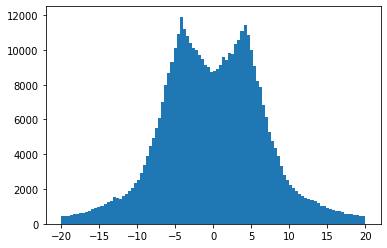

In [10]:
px1 = ds['px1']
plt.hist(px1, bins=100, range=(-20.,20.))
plt.show()

You can change the cell above to plot some of the other muon properties



Next, let's look at the invariant mass, this has already been calculated and stored in the file as "M".

Run the cell below to plot the invariant mass.


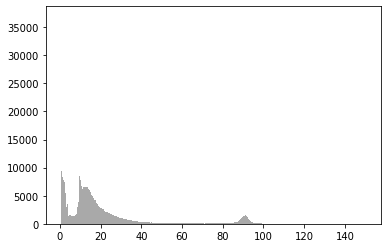

In [11]:


invariant_mass_1 = ds['M']

no_bins = 500

plt.hist(invariant_mass_1, no_bins, range=(0.5,150.), color="darkgrey")

#plt.yscale('log')
#plt.xscale('log')

plt.show()

We can add some axes labels and a title like this.....

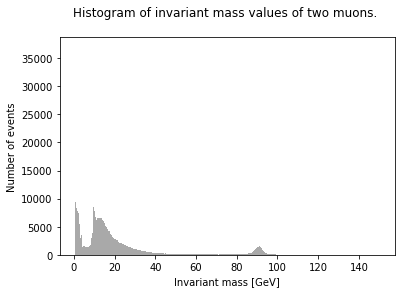

In [12]:
plt.hist(invariant_mass_1, no_bins, range=(0.5,150.), color="darkgrey")
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events')
plt.title('Histogram of invariant mass values of two muons. \n')
plt.show()

### Looking at the muon pair invariant mass spectrum

Below is the histogram published by the CMS experiment of the invariant mass of muon pairs. Does it look like yours??

Not quite.... That's beacuse the CMS plot uses log scales on the axes to make the plot clearer.

Try commenting out the lines "plt.yscale('log')" and then "plt.xscale('log')" in the cell above and re-running to see what happens.

Now it should look more similar.


<figure>
    <center> <img src="images/CMShistogram.png" alt="image missing" style="height: 350px" />
   <figcaption>Image 8: The histogram of the invariant masses published by the CMS experiment. &copy; <a href="https://arxiv.org/abs/1206.4071">CMS Collaboration</a> [5]</figcaption> </center>
</figure>

The plot shows a smooth 'background' of random coincidences and on top of that some 'peaks'

Each of these peaks is evidence for a particle decaying to muon pairs. 
The peaks correspond to known particles and have ben given labels.    
You can use the Particle Data Group <a href="https://pdg.lbl.gov/2020/tables/contents_tables.html"> website </a> if you want to know more about these particles.
If we saw a peak at a point where no known particle was expected this would be evidence of a new particle discovery.

### Identifying the Z boson - I think this is already explained above

We have just seen we can identify particles by reconstructing the invariant mass of the particles they decay to. We can look at any of these particles and study its properties. For example lets focus on the Z boson. In practice the identification of the Z boson goes in the following way. The invariant mass for two muons is calculated for the great amount of collision events. Then a histogram is made from the calculated values. The histogram shows how many invariant mass values will be in each bin of the histogram.

If a peak (many invariant mass values near the same bin compared to other bins) is formed in the histogram, it can prove that in the collision events there has been a particle with a mass that corresponds to the peak. After that it is possible to fit a function to the histogram and determine the mass and the lifetime of the Z from the parameters of the fitted function. In the histogram we plotted the invariant mass was calculated for us. Let's calculate the invariant mass ourselves

<!-- ### Question 2 -->

<!--
Let's practice the calculation of the invariant mass with the following task. Let's assume that for one muon pair the following values have been measured or determined:

- $p_{T1} = 58,6914$ GeV/c
- $p_{T2} = 45,7231$ GeV/c
- $\eta_1 = -1,02101$
- $\eta_2 = -0,37030$
- $\phi_1 = 0,836256$ rad
- $\phi_2 = 2,741820$ rad

Calculate the invariant mass value for this single pair of muons.

Compare the calculated value to the mass of the Z boson reported by the Particle Data Group (PDG, http://pdg.lbl.gov/). What do you notice? Can you make sure conclusions from your notifications?

That's the end of the theory part of this exercise. You can now move on to analysing the data.
-->

### Exercise 4 :  Calculating the invariant mass

Now let's calculate the invariant mass for the muon pairs for ourselves.
 
You have to write a proper equation only once since code executes the equation automatically for each row of the file.

For example if you would like to sum the electrical charges of two muons for each event and save results in a variable _charges_, it could be done with the following code:
```
charges = ds.Q1 + ds.Q2
```

So you have to tell in the code that Q1 and Q2 refer to values in the variable `ds`. This can be done by adding the variable name separated with a dot in front of the value that is wanted, as in the example above.

Remember that you can use 'sqrt'  from the _numpy_ module that we named as _np_. You can get a square root with the function `np.sqrt()`.  Naturally inside the brackets there will be anything that is inside the square root or brackets in the equation too.

__Write below code__ that will calculate the invariant mass value for muon pairs in each collision event in the data file. 

You need to use the muons energy and momentum and then use equation 2 to calculate the invariant mass of the parent particle:

$$
M = \sqrt{(E)^2 - (\vec{p})^2} = \sqrt{(E_1+E_2)^2 - (\vec{p_1} + \vec{p_2})^2}, \qquad (2)
$$



The energy of each particle can be calculated from:
$$
E_1^2 = \vec{p_1}^2 + m_{1}^2
$$

Remember that momentum is a vector so:
$$
\vec{p_1}^2 = (p_1^x)^2 +  (p_1^y)^2 +  (p_1^z)^2 
$$

where $p_1^x$ is the $x$-component of the momentum of particle 1. 


Save the values calculated in a variable called `invariant_mass`.

There are some comments in the cell below to help you with the different steps.

If you run the second cell below, the code will print the first five values that are calculated and will tell if the calculation is correct. 


In [1]:


#Mass of the Muon
muMass = 0.105658

#Momentum squared for the two individual muons
# Rmember you get each component of the momentum using, e.g. ds.px1


#Energy of the two individual muons


#Total Energy of the two muons 


#Momentum squared of the muon pair vector (p1+p2) - remember to add the vectors before squaring


#Invariant mass

invariant_mass = ## your final calculation here 



SyntaxError: invalid syntax (<ipython-input-1-f413077ec414>, line 19)

In [ ]:

print('The first five values calculated (in units GeV):')
print(invariant_mass[0:5])

# Rest of the code is for checking if the values are correct. You don't have to change that.
if 14.31 <= invariant_mass.values[4] <= 14.32:
    print('Invariant mass values are correct!')
else:
    print('Calculated values are not yet correct. Please check the calculation one more time.')
    print('Remember: don´t change the name of the variable invariant_mass.')

<details>
    <summary>Answer</summary>

<code>
# Mass of the Muon
muMass = 0.105658   

\# Momentum squared for the two muons
p1_squared = (ds.px1)\*\*2 + (ds.py1)\*\*2 + (ds.pz1)\*\*2
p2_squared = (ds.px2)\*\*2 + (ds.py2)\*\*2 + (ds.pz2)\*\*2

\# Energy of the two muons
e1 = np.sqrt(p1_squared + (muMass\*muMass))
e2 = np.sqrt(p2_squared + (muMass\*muMass))

\# Total Energy of the two muons 
epair =  e1 + e2

\# Momentum squared of the muon pair vector
ptpair_squared = (ds.px1 + ds.px2)\*\*2 + (ds.py1 + ds.py2)\*\*2 + (ds.pz1 + ds.pz2)\*\*2

invariant_mass = np.sqrt(epair**2 - ptpair_squared)
    
</code>
    
</details>

#### Creating the histogram


Next, write down a code that will create a histogram from the invariant mass values that you calculated. 

Because this exercise focuses on the Z boson, set the range wisely to get the values near the mass of the Z boson. Use the Z boson mass value that you looked earlier from the Particle Data Group as a reference.

Try what is the best amount of bins to make a clear histogram. You can try different values and see how they affect to the histogram.

In the code there are already lines for naming the axes and the title of the histogram. 

If you get stuck use the hints below. But try to create the histogram without using the hints!

<details>
    <summary>Hint 1</summary>
    
    The invariant mass values that you have calculated are saved in the variable "invariant_mass".
</details>

<details>
    <summary>Hint 2</summary>
    
    The function is in the form "plt.hist(x, bins=0, range=(0,0))", where x will be replaced with the name of the variable that contains the data that is wanted to be used in the histogram (in our case the invariant masses). The zeroes will be replaced with the wanted amount of bins and with the lower and upper limits of the histogram.
</details>

<details>
    <summary>Hint 3</summary>
    
    Try different bin values between 50 and 200.
</details>

In [ ]:
# Write down the line of code that will create the histogram (use plt.hist as we did earlier).




<details>
    <summary>Answer</summary>


plt.hist(invariant_mass, bins=120, range=(60,120))


    
</details>

You can also add some axes labels and a title as we did previously....

In [2]:
# Let's name the axes and add a title. 


In [3]:
<details>
    <summary>Answer</summary>

plt.hist(invariant_mass, bins=120, range=(60,120))

plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events')
plt.title('Histogram of invariant mass values of two muons. \n')
plt.show()

    
</details>

SyntaxError: invalid syntax (<ipython-input-3-e93a534b81a6>, line 1)


#### Question 3 : Describe the histogram. What information can you get from it?


Answer.....


You can try changing the range of the histogram to look at different parts of the mass spectrum we saw in the first part of the exercise.

For example in the range 2.5-4 you can see the 'J/psi' particle.


#### Question 4 : What do you notice about the Upsilon particle??

Answer: .....


### Exercise 5 : Looking for Higgs to 4 lepton decays

Now that we can reconstruct invariant masses we can look to find the mass of the Higgs via its decay to two Z bosons. As the Z boson is not stable and decays we can identfiy the Z boson by its decay to two leptons as above. Consequently the Higgs boson can end up decaying to 4 leptons. We can look at the final states electron-positron and electron-positron, electron-positron and muon- muon+ as well as muon- muon+ muon- muon+

<b> Would some Feyman diagrams help here?? </b>

To calculate the invariant mass of the Higgs we need to know the mass of the particles in the final state. There are three different mass configurations here so three different calculations. We could look at the invariant mass distribution of each state and then add them together to get the final distribution  

#### $p >> m$

Alternatively, because these are high energy collisions the momentum of the muons and electron is much higher than its mass. Therefore the mass contibution to energy is negligible, so we can just set the mass of the electron and muon to zero. Now we can add all the electron-positron and electron-positron, electron-positron and muon- muon+ as well as muon- muon+ muon- muon+ data together as their only physical difference is their mass and we have set this to zero. Have a try!  Calculate the invariant mass of all the datasets in one go!

#### 4 lepton invariant mass

<details>
    <summary>Answer</summary>

<code>
ds_2e2mu_2011 = pd.read_csv('2e2mu_2011.csv')
ds_2e2mu_2012 = pd.read_csv('2e2mu_2012.csv')
ds_4e_2011 = pd.read_csv('4e_2011.csv')
ds_4e_2012 = pd.read_csv('4e_2012.csv')
ds_4mu_2011 = pd.read_csv('4mu_2011.csv')
ds_4mu_2012 = pd.read_csv('4mu_2012.csv')

ds2 = pd.concat([ds_2e2mu_2011, ds_2e2mu_2012, ds_4e_2011, ds_4e_2012, ds_4mu_2011, ds_4mu_2012], axis=0, ignore_index=True)

#Particles 1 and 2 are the electron and positron
#Particles 3 amd 4 are the muon- and muon + 


#Momentum squared for the 4 leptons
p1_squared = (ds2.px1)\*\*2 + (ds2.py1)\*\*2 + (ds2.pz1)\*\*2
p2_squared = (ds2.px2)\*\*2 + (ds2.py2)\*\*2 + (ds2.pz2)\*\*2
p3_squared = (ds2.px3)\*\*2 + (ds2.py3)\*\*2 + (ds2.pz3)\*\*2
p4_squared = (ds2.px4)\*\*2 + (ds2.py4)\*\*2 + (ds2.pz4)\*\*2

#Energy of the leptons
e1 = np.sqrt(p1_squared)
e2 = np.sqrt(p2_squared)
e3 = np.sqrt(p3_squared)
e4 = np.sqrt(p4_squared)

#Total Energy of the four leptons
epair =  e1 + e2 + e3 + e4

#Momentum squared of the four leptons
ptleptons_squared = (ds2.px1 + ds2.px2 + ds2.px3 + ds2.px4)\*\*2 + (ds2.py1 + ds2.py2+ ds2.py3 + ds2.py4)\*\*2 + (ds2.pz1 + ds2.pz2 + ds2.pz3 + ds2.pz4)\*\*2

invariant_mass_2e2mu = np.sqrt(epair\*\*2 - ptleptons_squared)
    
    
</code>
    
</details>

In [ ]:
# Write down there a code that will create the histogram.
plt.hist(invariant_mass_2e2mu, bins=60, range=(45,180))

# Let's name the axes and the title. Don't change these.
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events')
plt.title('Histogram of invariant mass values of four leptons. \n')

plt.arrow(70, 10, 18, -1.8,length_includes_head=True, width=0.2, fc='r', ec='r')
plt.arrow(125, 9, 0, -3.5,length_includes_head=True, width=0.5, fc='r', ec='r')
plt.text(118, 10.5, 'Higgs Boson', fontsize=12)
plt.text(60, 10.5, 'Z Boson', fontsize=12)

plt.show()

Combining the 4 lepton data we start to see hints of the Higgs particle decaying to 4 leptons at a mass of around 126 $GeV/c^2$

### Compare to the CMS analysis

We can compare our distribution to the CMS analysis. Bear in mind the image produce below uses more data and a more sophisticated analysis. For example looking at events with more than 4 leptons where the additional leptons can come from other particles in the event 

<figure>
    <img src="images/CMS-HIGGSTOZZ.png" alt="image missing" style="height: 350px" />
 <center>   <figcaption>Image 9: Distribution of the reconstructed four-lepton invariant mass in the low-mass range. &copy; <a href="https://arxiv.org/abs/1706.09936">CMS Collaboration</a> [6]</figcaption> </center>
</figure>

## In the end

Now you have completed the exercise. Feel free to go back and test some different values to the code and see what happens. You can also create a new code cell by clicking "INSERT" -> "Insert Cell Below" and try to write some of your own code too!

More information about the CERN Open Data can be found from http://opendata.cern.ch/.

# Further Work

If you have finished all the exercises above and would like to do more, look at the sections below on fitting the Z mass plot and the effect of pseudorapidity

## Extension exercise 1 : Fitting a function to the Z mass histogram

**** Change this to gaussian *****

To get information about mass and lifetime of the detected resonance, a function that describes the distribution of the invariant masses must be fitted to the values of the histogram. In our case the values follow a Breit-Wigner distribution:

$$
N(E) = \frac{K}{(E-M)^2 + \frac{\Gamma^2}{4}},
$$

where $E$ is the energy, $M$ the maximum of the distribution (equals to the mass of the particle that is detected in the resonance), $\Gamma$ the full width at half maximum (FWHM) or the decay width of the distribution and $K$ a constant.

The Breit-Wigner distribution can also be expressed in the following form:

$$
\frac{ \frac{2\sqrt{2}M\Gamma\sqrt{M^2(M^2+\Gamma^2)} }{\pi\sqrt{M^2+\sqrt{M^2(M^2+\Gamma^2)}}} }{(E^2-M^2)^2 + M^2\Gamma^2},
$$

where the constant $K$ is written open.

The decay width $\Gamma$ and the lifetime $\tau$ of the particle detected in the resonance are related in the following way:

$$
\Gamma \equiv \frac{\hbar}{\tau},
$$

where $\hbar$ is the reduced Planck's constant.

With the code below it is possible to optimize a function that represents Breit-Wigner distribution to the values of the histogram. The function is already written in the code. It is now your task to figure out which the values of the maximum of the distribution $M$ and the full width at half maximum of the distribution $\Gamma$ could approximately be. The histogram that was created earlier will help in this task.

Write these initial guesses in the code in the line `initials = [#THE INITIAL GUESS FOR GAMMA, #THE INITIAL GUESS FOR M, -2, 200, 13000]`. In other words replace the two comments in that line with the values that you derived.

Notice that the initial guesses for parameters _a, b_ and _A_ have been already given. Other comments in the code can be left untouched. From them you can get information about what is happening in the code.

After running the code Jupyter will print the values of the different parameters as a result of the optimization. Also uncertainties of the values and a graph of the fitted function are printed. The uncertainties will be received from the covariance matrix that the fitting function `curve_fit` will return.

<details>
    <summary>Hint 1</summary>
    
    Think how M and gamma could be determined with the help of the histogram. Look from the histogram that you created that which would approximately be the values of M and gamma.
</details>

<details>
    <summary>Hint 2</summary>
    
    If you figured out the initial guesses to be for example gamma = 12 and M = 1300 (note that these values are just random examples!) write them to the code in the form "initials = [12, 1300, -2, 200, 13000]".
</details>

The values and the uncertainties from the optimization

The value of the decay width (gamma) = 3.9256134370988693 +- 0.0771482162663486
The value of the maximum of the distribution (M) = 90.80163821162027 +- 0.0302306428037452
a = -1.6446681556767309 +- 0.1252757169081511
b = 168.30376111622513 +- 12.655591393525658
A = 13102.560043127934 +- 178.61390834275056


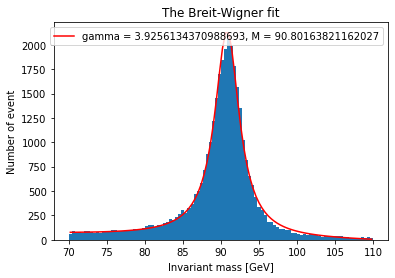

In [9]:
ds = pd.read_csv('DoubleMuRun2011A.csv')

invariant_mass = ds['M']

# Let's limit the fit near to the peak of the histogram.
lowerlimit = 70
upperlimit = 110
bins = 100

# Let's select the invariant mass values that are inside the limitations.
limitedmasses = invariant_mass[(invariant_mass > lowerlimit) & (invariant_mass < upperlimit)]

#Let's create a histogram of the selected values.
histogram = plt.hist(limitedmasses, bins=bins, range=(lowerlimit,upperlimit))

# In y-axis the number of the events per each bin (can be got from the variable histogram).
# In x-axis the centers of the bins.
y = histogram[0]
x = 0.5*( histogram[1][0:-1] + histogram[1][1:] )

# Let's define a function that describes Breit-Wigner distribution for the fit.
# E is the energy, gamma is the decay width, M the maximum of the distribution
# and a, b and A different parameters that are used for noticing the effect of
# the background events for the fit.
def breitwigner(E, gamma, M, a, b, A):
    return a*E+b+A*( (2*np.sqrt(2)*M*gamma*np.sqrt(M**2*(M**2+gamma**2)))/(np.pi*np.sqrt(M**2+np.sqrt(M**2*(M**2+gamma**2)))) )/((E**2-M**2)**2+M**2*gamma**2)

# Initial values for the optimization in the following order:
# gamma (the full width at half maximum (FWHM) of the distribution)
# M (the maximum of the distribution)
# a (the slope that is used for noticing the effect of the background)
# b (the y intercept that is used for noticing the effect of the background)
# A (the "height" of the Breit-Wigner distribution)
#initials = [#THE INITIAL GUESS FOR GAMMA, #THE INITIAL GUESS FOR M, -2, 200, 13000]

initials = [10,90,-2,150,13000]

# Let's import the module that is used in the optimization, run the optimization
# and calculate the uncertainties of the optimized parameters.
from scipy.optimize import curve_fit
best, covariance = curve_fit(breitwigner, x, y, p0=initials, sigma=np.sqrt(y))
error = np.sqrt(np.diag(covariance))
    
# Let's print the values and uncertainties that are got from the optimization.
print("The values and the uncertainties from the optimization")
print("")
first = "The value of the decay width (gamma) = {} +- {}".format(best[0], error[0])
second = "The value of the maximum of the distribution (M) = {} +- {}".format(best[1], error[1])
third = "a = {} +- {}".format(best[2], error[2])
fourth = "b = {} +- {}".format(best[3], error[3])
fifth = "A = {} +- {}".format(best[4], error[4])
print(first)
print(second)
print(third)
print(fourth)
print(fifth)

plt.plot(x, breitwigner(x, *best), 'r-', label='gamma = {}, M = {}'.format(best[0], best[1]))
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of event')
plt.title('The Breit-Wigner fit')
plt.legend()
plt.show()

The values and the uncertainties from the optimization

The value of the maximum of the distribution (M) = 90.66002084902641 +- 0.18705786843092256
The value of the width of the distribution, (sigma) = 2.793509592195788 +- 0.164166645933664
N = 2740.2483541524043 +- 243.58528665098916


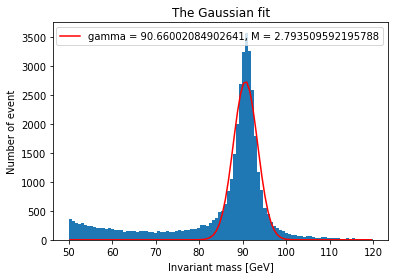

In [11]:
## JK Try a gaussian

ds = pd.read_csv('DoubleMuRun2011A.csv')

invariant_mass = ds['M']


# Let's limit the fit near to the peak of the histogram, between 70 and 110.
lowerlimit = 50
upperlimit = 120
bins = 100

# Let's select the invariant mass values that are inside the limitations.
limitedmasses = invariant_mass[(invariant_mass > lowerlimit) & (invariant_mass < upperlimit)]

#Let's create a histogram of the selected values.
histogram = plt.hist(limitedmasses, bins=bins, range=(lowerlimit,upperlimit))

# In y-axis the number of the events per each bin (can be got from the variable histogram).
# In x-axis the centers of the bins.
#print (histogram)
y = histogram[0]
x = 0.5*( histogram[1][0:-1] + histogram[1][1:] )
#print (y,x)

# Let's define a gaussian function for the fit.
# 'x' is the calculated invariant mass of the muons, 'mean' and 'sigma' are the mean and width of the gaussian 
# and N is the number of events at the maximum of the distribution


def gauss(x, mean, sigma, N):
    return N * np.exp(-(x - mean) ** 2 / (2 * sigma ** 2))

# We ned to put some initial guesses for mean, sigma and N
#initials = [#THE INITIAL GUESS FOR mean, #THE INITIAL GUESS FOR sigma, #THE INITIAL GUESS for N]

initials = [ 90,10, 13000]

# We import a module (curve_fit) that is used to fit the gaussian function to the data and find optimised parameters
from scipy.optimize import curve_fit
best, covariance = curve_fit(gauss, x, y, p0=initials, sigma=np.sqrt(y))
error = np.sqrt(np.diag(covariance))
    
# Let's print the values and uncertainties that are got from the optimization.
print("The values and the uncertainties from the optimization")
print("")
first = "The value of the maximum of the distribution (M) = {} +- {}".format(best[0], error[0])
second = "The value of the width of the distribution, (sigma) = {} +- {}".format(best[1], error[1])
third = "N = {} +- {}".format(best[2], error[2])

print(first)
print(second)
print(third)


plt.plot(x, gauss(x, *best), 'r-', label='gamma = {}, M = {}'.format(best[0], best[1]))
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of event')
plt.title('The Gaussian fit')
plt.legend()
plt.show()

You can see that the fit is not particualrly good.

You can try changing the region of the hostogram being fit to get a better agreement.


You will notice that as well as the peak there is some underlying flat-ish distribution - this comes from events with muon pairs which come from other decay processes than the those of the <b> Z </b> boson.

The background can be taken into account by modifting the gaussian fuction used in the code.
In the cell below a new function (gauss2) is defined with an extra term: `a*E+b`, where $aE + b$ takes care of the background.


The values and the uncertainties from the optimization

The value of the decay width (gamma) = 90.7452369284229 +- 0.0676294580309556
The value of the maximum of the distribution (M) = 2.4001213989555854 +- 0.05928472007083824
a = -3.3537584593520138 +- 0.18840822289507062
b = 408.7309805925962 +- 19.82102130272289
A = 2938.5911031234186 +- 102.8157987841095


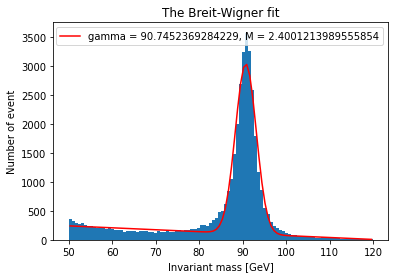

In [12]:
histogram2 = plt.hist(limitedmasses, bins=bins, range=(lowerlimit,upperlimit))
y = histogram2[0]
x = 0.5*( histogram2[1][0:-1] + histogram[1][1:] )

def gauss2(x, mean, sigma, a,b, A):
    return a*x + b + A * np.exp(-(x - mean) ** 2 / (2 * sigma ** 2))

initials2 = [ 90,10, -2, 300 ,13000]

best, covariance = curve_fit(gauss2, x, y, p0=initials2, sigma=np.sqrt(y))
error = np.sqrt(np.diag(covariance))

# Let's print the values and uncertainties that are got from the optimization.
print("The values and the uncertainties from the optimization")
print("")
first = "The value of the decay width (gamma) = {} +- {}".format(best[0], error[0])
second = "The value of the maximum of the distribution (M) = {} +- {}".format(best[1], error[1])
third = "a = {} +- {}".format(best[2], error[2])
fourth = "b = {} +- {}".format(best[3], error[3])
fifth = "A = {} +- {}".format(best[4], error[4])
print(first)
print(second)
print(third)
print(fourth)
print(fifth)

plt.plot(x, gauss2(x, *best), 'r-', label='gamma = {}, M = {}'.format(best[0], best[1]))
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of event')
plt.title('The Breit-Wigner fit')
plt.legend()
plt.show()

The fit should be better now.

There is still not perfect agreement. This is becasue the <b> Z </b> decay is not actually descried by a agussian function but by a slightly more complicated <b> Breit-Wigner </b> function. You can find out more about this here.


#### Notification 3:

Even more correct way for doing the fit and getting the values and the uncertainties from it would be to iterate the fit several times. In the iteration a next step would take initial guesses from the previous fit.

## Analysing the histogram

### Question 4

What can you say about the appearance of the Z boson based on the histogram and the fitted function?

Can you define the mass of the Z with the uncertainty? How?

Explain your answers with the help from the theory part and other sources.

### Question 5


The width of the decay (called $\Gamma$) and the lifetime $\tau$ of the particle detected in the resonance are related in the following way:

$$
\Gamma \equiv \frac{\hbar}{\tau},
$$

where $\hbar$ is the reduced Planck's constant.



Calculate the lifetime $\tau$ of the Z boson with the uncertainty by using the fit.

Compare the calculated value to the known lifetime of the Z. What do you notice? What could possibly explain your observations?

### Question 6

When was the Z boson detected first time and what is the physical meaning of the Z?

### Question 7

If energy and momentum could be measured by infinite accuracy, would there be an one exact peak that differs from the other distribution, or an distribution in the histogram on the location of the mass of the Z? Justify your answer.

### Question 8

## Extension exercise 2 : Effect of pseudorapidity to the mass distribution


In this final section, we will study how the <b> pseudorapidities </b> of muons that are detected in the CMS detector alter the mass distribution.

Pseudorapidity (denoted by $\eta$) is a measure of the angle the detected particle makes with the particle beam (z-axis). 
The angle itself is called $\theta$ (see diagram below). 

Pseudorapity is then determined with the equation:

$$
\eta = -\ln(\tan(\frac{\theta}{2}))
$$

From the image one can see that, in practise, a large pseudorapidity means that the particle has continued almost among the beam-line after the collision.
 And vice versa: a small pseudorapidity means that the particle is more perpendicular to the beam-line


<figure>
  <center>  <img src="images/CMSangles.png" alt="image missing" style="height: 300px" />
     <figcaption>Image 10: Quantities $\theta$, $\eta$ and $\phi$ in the CMS detector.</figcaption> </center>
</figure>

The image 11 below shows a situation where two particle beams from left and right collide. The image shows two muons with different pseudorapidities. The muon with the smaller pseudorapidity hits the barrel part of the detector when the muon with the greater pseudorapidity goes to the endcap of the detector. There are also muon chambers in the both ends of the detector so these muons can also be detected.

<figure>
   <center>  <img src="images/pseudorapidities.png" alt="image missing" style="height: 300px" />
    <figcaption>Image 11: Two particles with different pseudorapidities in the CMS detector.</figcaption> </center>
</figure>

In this final section, two different histograms will be made: one using only muon pairs with small pseudorapidities and one using only those with large pseduorapidities. We can then study how the pseudorapidities of the muons that are detected in the CMS detector affect the mass distribution.  

### Selecting the events

Next let’s create two variables for dividing the events: `small_etas` and `large_etas`. To the first one we will save only collision events where pseudorapidities of  both the detected muons are small (for example under 0.38). And to the second one we save only those events there the pseudorapidities are both large (for example over 1.52). Absolute values will be used because $\eta$ can have both positove and negative values.

Complete the code cell below by determining the variables `small_etas` and `large_etas` in a way that the division described above will be made. You will need the following functions:

- `ds[condition]` selects from the variable `ds` only events which fulfill the condition written inside the brackets. There can also be more than one condition. Then the function is in the form `ds[(condition1) & (condition2)]`
- an example of this could be a function where from the variable `example` only rows where the values of the columns `a` and `b` have been both greater than 8 would be selected: `example[(example.a > 8) & (example.b > 8)]`
- you can get the absolute values with the function `np.absolute()` from the _numpy_ module
- pseudorapidity of the first muon is `ds.eta1` and the second `ds.eta2`
- ”greater than” and ”smaller than” comparisons can be made in Python straight with the symbols > and <
- Python uses a dot as a decimal separator (for example 0.38)

<details>
    <summary>Hint 1</summary>
    
    Remember to define the small values in a way that both eta1 and eta2 are smaller than 0.38. And same for the large values.
</details>

<details>
    <summary>Hint 2</summary>
    
    Remember to tell from which variable you want to get the values of the pseudorapidities (write ds.eta1 or ds.eta2). Remember to use "np." in front of the absolute value function.
</details>

<details>
    <summary>Hint 3</summary>
    
    The first variable with the conditions is "large_etas = ds[(np.absolute(ds.eta1) > 1.52) & (np.absolute(ds.eta2) > 1.52)]" and the second "small_etas = ds[(np.absolute(ds.eta1) < 0.38) & (np.absolute(ds.eta2) < 0.38)]".
</details>

In [6]:
# Let's import the needed modules.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# With this line the data is imported and saved to the variable "ds".
ds = pd.read_csv('DoubleMuRun2011A.csv')

large_etas =  ds[(np.absolute(ds.eta1) > 1.52) & (np.absolute(ds.eta2) > 1.52)]
small_etas =  ds[(np.absolute(ds.eta1) < 0.38) & (np.absolute(ds.eta2) < 0.38)]

# Let's print out some information about the selection
print('Total number of events = %d' % len(ds))
print('Number of events where the pseudorapidity of the both muons is large = %d' %len(large_etas))
print('Number of events where the pseudorapidity of the both muons issmall = %d' %len(small_etas))

Total number of events = 475465
Number of events where the pseudorapidity of the both muons is large = 34263
Number of events where the pseudorapidity of the both muons issmall = 34337


### Creating the histograms


Run the code cell below to create separate histograms from the events with small and with large values of pseudorapidities. The cell will get the invariant masses for both of the selections and will create the histograms out of them near to the peak of the Z boson.

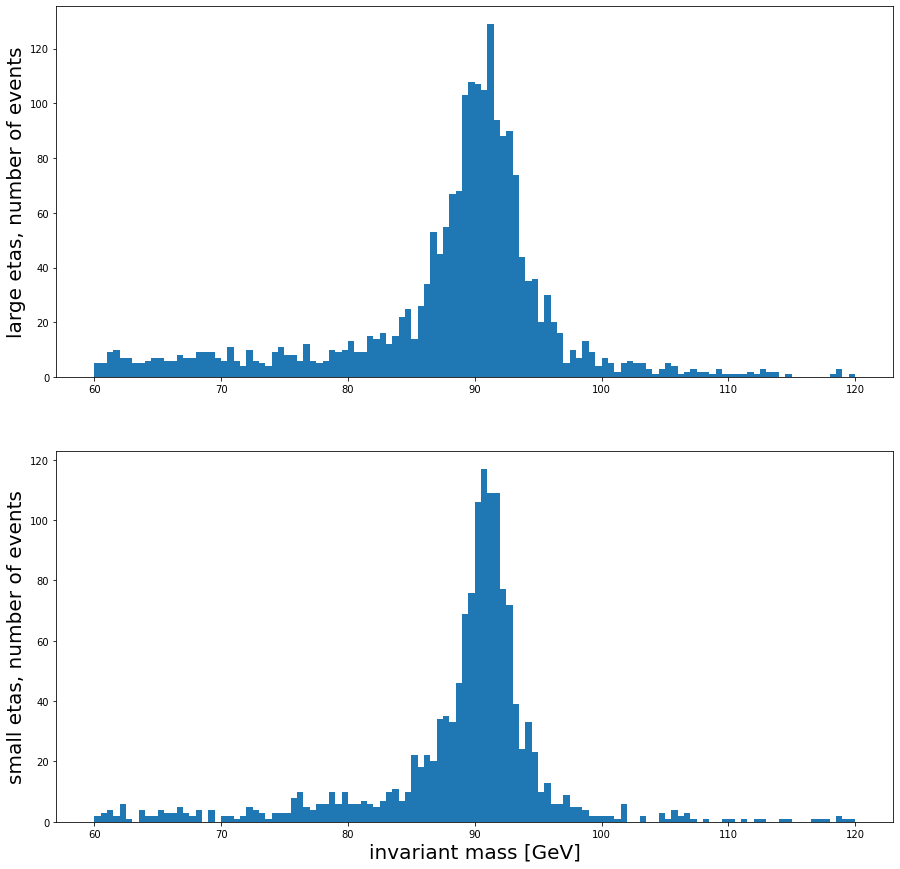

In [8]:
# Let's differ the invariant masses of the large and small pseudorapidity
# events for making the histograms.
inv_mass_large = large_etas['M']
inv_mass_small = small_etas['M']

# Let's use the matplotlib.pyplot module to create a custom size
# figure where the two histograms will be plotted.
f = plt.figure(1)
f.set_figheight(15)
f.set_figwidth(15)
plt.subplot(211)
plt.hist(inv_mass_large, bins=120, range=(60,120))
plt.ylabel('large etas, number of events', fontsize=20)
plt.subplot(212)
plt.hist(inv_mass_small, bins=120, range=(60,120))
plt.ylabel('small etas, number of events', fontsize=20)
plt.xlabel('invariant mass [GeV]', fontsize=20)
plt.show()

### Question 9

Compare the two histograms that were created above. In what way does the pseudorapidity of the muons affect the mass distribution?

What could possibly explain your observations?

First try to think of the explanation by yourself, then you can open the explanation below to see how you did.

<details>
    <summary>Click here to open the explanation</summary>
    
    From the histograms one can see that the events where the pseudorapidity of both of the muons is small, produces a narrower peak than the events where the muons have large  pseudorapidities. That means that the <b> resolution </b> of the invariant masses is worse with larger pseudorapidities.
    
    The worse resolution follows from the fact that the resolution of the transverse momentum ($p_T$ , the component of momentum that is perpendicular to the particle beams) is worse for muons with greater pseudorapidities. This can be seen for example from image 21 on page 32 of the CMS paper https://arxiv.org/pdf/1206.4071.pdf
    
    The explanation for the effect of the pseudorapidity on the resolution is that the particles which enter the endcap of the detector (larger pseudorapidities) will more probably interact with the material of the detector than the muons with smaller pseudorapidities (check the image 8). In these interactions muons will lose some of their energy. This messes up slightly the fitting of the trajectories of the muons and the measurement of the transverse momentum. The measurement of the transverse momentum also depends on, for example, the orientation of the muon chambers, the amount of material in the detector and the magnetic field. It can be assumed that these things are worse known for particles that have larger pseudorapidities.
</details>

### Sources

[1] P. Mouche, *Overall view of the LHC. Vue d'ensemble du LHC*, 2014.
Url: [https://cds.cern.ch/record/1708847](https://cds.cern.ch/record/1708847).

[2] M. Brice, *View of an open LHC interconnection. Vue d'une interconnection ouverte*, 2005.
Url: [https://cds.cern.ch/record/905940](https://cds.cern.ch/record/905940)

[3] CMS Collaboration, *Detector Drawings*, 2012.
Url: [https://cds.cern.ch/record/1433717](https://cds.cern.ch/record/1433717).

[4] M. Lapka, D. Barney, E. Quigg et al., *Interactive slice of CMS detector*, 2010.
Url: [https://cms-docdb.cern.ch/cgi-bin/PublicDocDB/ShowDocument?docid=4172](https://cms-docdb.cern.ch/cgi-bin/PublicDocDB/ShowDocument?docid=4172).

[5] CMS Collaboration, *Performance of CMS muon reconstruction in pp collision events at $\sqrt{s} =$ 7 TeV*, 2012.
Url: [arXiv:1206.4071](https://arxiv.org/abs/1206.4071).

[6] CMS Collaboration, *Measurements of properties of the Higgs boson decaying into the four-lepton final state in pp collisions at $\sqrt{s} =$ 13 TeV*, 2017. Url: [arXiv:1706.09936](https://arxiv.org/abs/1706.09936).